# <center style='color:lightseagreen'>`Bagging Classifier` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

# 2. Load `glass_identification` dataset

In [2]:
df = pd.read_csv('glass_identification.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [5]:
df.Type_of_glass.unique()

array([1, 2, 3, 5, 6, 7])

In [6]:
df.Type_of_glass.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

# 3. Separate features and classes

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 4. Split the dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test)

(171, 43, 171, 43)

# 5. Apply `Bagging Classifier`

In [10]:
clf = BaggingClassifier(oob_score=True, random_state=42)
clf.fit(X_train, y_train)
clf.oob_score_

0.6783625730994152

In [11]:
print('Accuracy on the train set:', round(clf.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(clf.score(X_test, y_test), 4))

Accuracy on the train set: 0.9883
Accuracy on the test set: 0.8372


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf_ = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), oob_score=True, random_state=42)
clf_.fit(X_train, y_train)
clf_.oob_score_

0.6549707602339181

In [13]:
print('Accuracy on the train set:', round(clf_.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(clf_.score(X_test, y_test), 4))

Accuracy on the train set: 0.883
Accuracy on the test set: 0.8605


# 6. Plot `confusion_matrix`

In [14]:
y_pred = clf_.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=clf_.classes_)

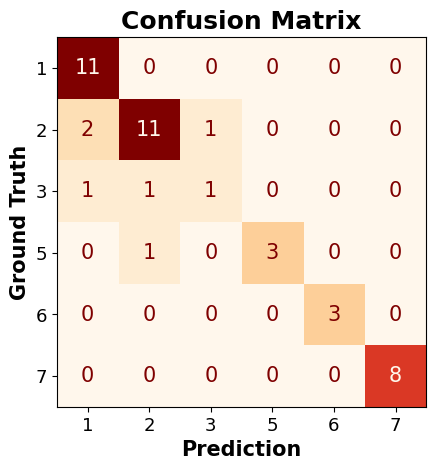

In [15]:
disp.plot(cmap='OrRd', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [16]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred, average='weighted'), 4))

F1 score: 0.8539


# 7. Print `classification_report`

In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.85      0.79      0.81        14
           3       0.50      0.33      0.40         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.86        43
   macro avg       0.86      0.81      0.83        43
weighted avg       0.86      0.86      0.85        43

